In [1]:
# v9: machine hack data

In [2]:
!pip install prophet

In [3]:
import prophet as p
import pandas as pd

In [4]:
import glob
g=glob.glob('../input/dataset-2-for-airfare/train_data.csv')

In [5]:
#!pip install openpyxl

In [6]:
df=pd.read_csv(g[0])
#m = p.Prophet()
#m.fit(df)
df.columns

Index(['Unnamed: 0', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Departure_hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_Hours', 'Duration_Min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [8]:
df1=df[["Price"]].copy()
df1.columns

Index(['Price'], dtype='object')

In [9]:
df2=df[['Journey_month','Journey_day']].copy()
df2.columns

Index(['Journey_month', 'Journey_day'], dtype='object')

In [11]:
df2['Departure_year']=2019
df2.head()

,Journey_month,Journey_day,Departure_year
0,3,24,2019
1,5,1,2019
2,6,9,2019
3,5,12,2019
4,3,1,2019


In [12]:
df2.columns=['month','day','Year']
df2.head()

,month,day,Year
0,3,24,2019
1,5,1,2019
2,6,9,2019
3,5,12,2019
4,3,1,2019


In [13]:
df1['ds']=pd.to_datetime(df2[['Year','month','day']])

In [14]:
df1.columns=['y','ds']

In [15]:
df1.head()

,y,ds
0,3897,2019-03-24
1,7662,2019-05-01
2,13882,2019-06-09
3,6218,2019-05-12
4,13302,2019-03-01


In [16]:
m = p.Prophet()
m.fit(df1)

In [17]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
400,2020-06-22
401,2020-06-23
402,2020-06-24
403,2020-06-25
404,2020-06-26


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
400,2020-06-22,-20466.044952,-344640.406582,334718.893296
401,2020-06-23,-20787.422772,-346082.361795,334557.166006
402,2020-06-24,-20688.903894,-348348.100822,337317.755994
403,2020-06-25,-20459.675186,-348650.042487,338723.577188
404,2020-06-26,-22076.052972,-350606.102597,339816.583973


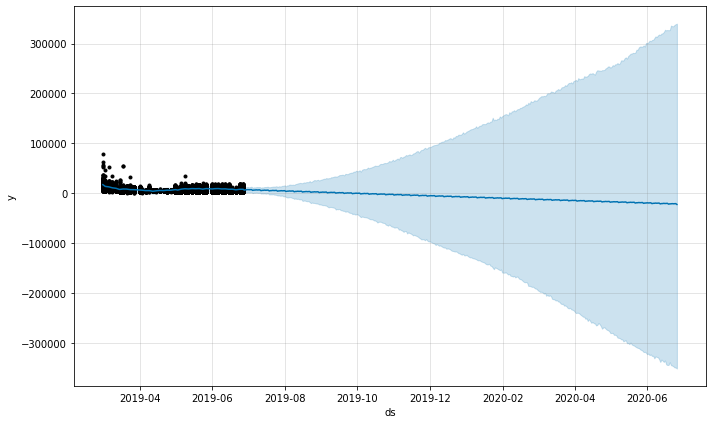

In [19]:
fig1 = m.plot(forecast)
